In [ ]:
!pip install odfpy

     |████████████████████████████████| 717 kB 5.5 MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=63e298e773a8b9b9e0303f116af4461818830d404bfb1b558c509ffa17732087
  Stored in directory: /root/.cache/pip/wheels/e2/f4/5d/a68c656235d33455a1d0f78e877acddfa006907a6d52d7e6ee
Successfully built odfpy


In [ ]:
import os
import keras as k
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import pandas as pd
import tensorflow as tf
from google.colab.patches import cv2_imshow
import math
from skimage.color import rgb2gray
from skimage.transform import resize
import shutil
import zipfile
import seaborn as sns
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from sklearn.model_selection import train_test_split

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/mrlEyes_2018_01.zip","r") as zip_ref:
    zip_ref.extractall("/home/")

In [ ]:
!rm -r '/home/mrlEyes_2018_01/s0037/'
!rm -r '/home/mrlEyes_2018_01/s0036/'
!rm -r '/home/mrlEyes_2018_01/s0034/'
!rm -r '/home/mrlEyes_2018_01/s0033/'
!rm -r '/home/mrlEyes_2018_01/s0032/'
!rm -r '/home/mrlEyes_2018_01/s0030/'
!rm -r '/home/mrlEyes_2018_01/s0029/'
!rm -r '/home/mrlEyes_2018_01/s0028/'
!rm -r '/home/mrlEyes_2018_01/s0027/'
!rm -r '/home/mrlEyes_2018_01/s0026/'
!rm -r '/home/mrlEyes_2018_01/s0025/'
!rm -r '/home/mrlEyes_2018_01/s0024/'
!rm -r '/home/mrlEyes_2018_01/s0023/'
!rm -r '/home/mrlEyes_2018_01/s0022/'
!rm -r '/home/mrlEyes_2018_01/s0021/'
!rm -r '/home/mrlEyes_2018_01/s0020/'
!rm -r '/home/mrlEyes_2018_01/s0019/'
!rm -r '/home/mrlEyes_2018_01/s0018/'
!rm -r '/home/mrlEyes_2018_01/s0016/'
!rm -r '/home/mrlEyes_2018_01/s0017/'
!rm -r '/home/mrlEyes_2018_01/s0014/'
!rm -r '/home/mrlEyes_2018_01/s0013/'
!rm -r '/home/mrlEyes_2018_01/s0012/'
!rm -r '/home/mrlEyes_2018_01/s0011/'
!rm -r '/home/mrlEyes_2018_01/s0002/'
!rm -r '/home/mrlEyes_2018_01/s0003/'
!rm -r '/home/mrlEyes_2018_01/s0004/'
!rm -r '/home/mrlEyes_2018_01/s0005/'
!rm -r '/home/mrlEyes_2018_01/s0007/'
!rm -r '/home/mrlEyes_2018_01/s0008/'
!rm -r '/home/mrlEyes_2018_01/s0010/'


In [ ]:
os.listdir('/home/mrlEyes_2018_01/')

['s0001',
 's0006',
 's0015',
 'stats_2018_01.ods',
 'annotation.txt',
 's0031',
 's0035',
 's0009']

In [ ]:
dataFrame = pd.read_excel('/home/mrlEyes_2018_01/stats_2018_01.ods')

In [ ]:
print(dataFrame)

   subject  gender  glasses  close  open  no reflection  low reflection  \
0    s0001       0     1616   1841  1401           2202              30   
1    s0002       0        0   1007   107           1114               0   
2    s0003       0        0    559   120            679               0   
3    s0004       0        0   1069     0           1068               1   
4    s0005       0        0    708    28            736               0   
5    s0006       0     1012   1011     1            137             814   
6    s0007       0        0    613    11            624               0   
7    s0008       0      832    832     0            567             213   
8    s0009       0        0    363    24            387               0   
9    s0010       0        0    331    68            399               0   
10   s0011       0        0   1508   140           1648               0   
11   s0012       0     2942   4497  4231           5175            1420   
12   s0013       0     13

Hacer un dataframe con las caracteristicas

subject ID:
xxx

image number:
xxx

gender:
0 - male
1 - famale

glasses:
0 - no
1 - yes

eye state:
0 - close
1 - open

reflections:
0 - none
1 - low
2 - high

lighting conditions/image quality:
0 - bad
1 - good

sensor type:
01 - RealSense SR300 640x480
02 - IDS Imaging, 1280x1024
03 - Aptina Imagin 752x480

example:
s001_00123_0_0_0_0_0_01.png


extrae las caracteristicas de un archivo

In [ ]:
def caracteristicas(dir):
  img = []
  genero = []
  lentes = []
  estadoOjo = []
  reflex = []
  condicion = []
  sensor = []

  for i in dir:
    try: 
      subDir = os.listdir('/home/mrlEyes_2018_01/'+i)
      for j in subDir:
        img.append(str(j))
        string = j.split('_')
        genero.append(int(string[2]))
        lentes.append(int(string[3]))
        estadoOjo.append(int(string[4]))
        condicion.append(int(string[5]))
        reflex.append(int(string[6]))
        sensor.append(int(string[7][:-4]))

    except:
      'no es dir'
  print(len(img),len(genero),len(lentes),len(estadoOjo),len(reflex))
  dataFrame = {'imagen':img,'genero':genero,'lentes':lentes,'estadoOjo':estadoOjo,'reflex':reflex,'sensor':sensor}
  dataFrame = pd.DataFrame(data = dataFrame)
  img = []
  genero = []
  lentes = []
  estadoOjo = []
  reflex = []
  condicion = []
  sensor = []
  return dataFrame

sensor ID [01 - RealSense, 02 - IDS, 03 - Aptina]; at this moment, the dataset contains the images captured by three different sensors (Intel RealSense RS 300 sensor with 640 x 480 resolution, IDS Imaging sensor with 1280 x 1024 resolution, and Aptina sensor with 752 x 480 resolution)


In [ ]:
data = caracteristicas(os.listdir('/home/mrlEyes_2018_01/'))

8153 8153 8153 8153 8153


In [ ]:
print(data)

                            imagen  genero  lentes  estadoOjo  reflex  sensor
0     s0001_00853_0_0_0_0_0_01.png       0       0          0       0       1
1     s0001_01468_0_1_0_0_0_01.png       0       1          0       0       1
2     s0001_01667_0_1_0_0_1_01.png       0       1          0       1       1
3     s0001_02094_0_0_1_0_0_01.png       0       0          1       0       1
4     s0001_00301_0_0_0_0_0_01.png       0       0          0       0       1
...                            ...     ...     ...        ...     ...     ...
8148  s0009_00225_0_0_0_0_0_01.png       0       0          0       0       1
8149  s0009_00174_0_0_0_0_0_01.png       0       0          0       0       1
8150  s0009_00120_0_0_0_0_0_01.png       0       0          0       0       1
8151  s0009_00108_0_0_0_0_0_01.png       0       0          0       0       1
8152  s0009_00226_0_0_0_0_0_01.png       0       0          0       0       1

[8153 rows x 6 columns]


taget ojos cerrados y abiertos y, otras caracteristicas x

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f167e99ccd0>,
      dtype=object)

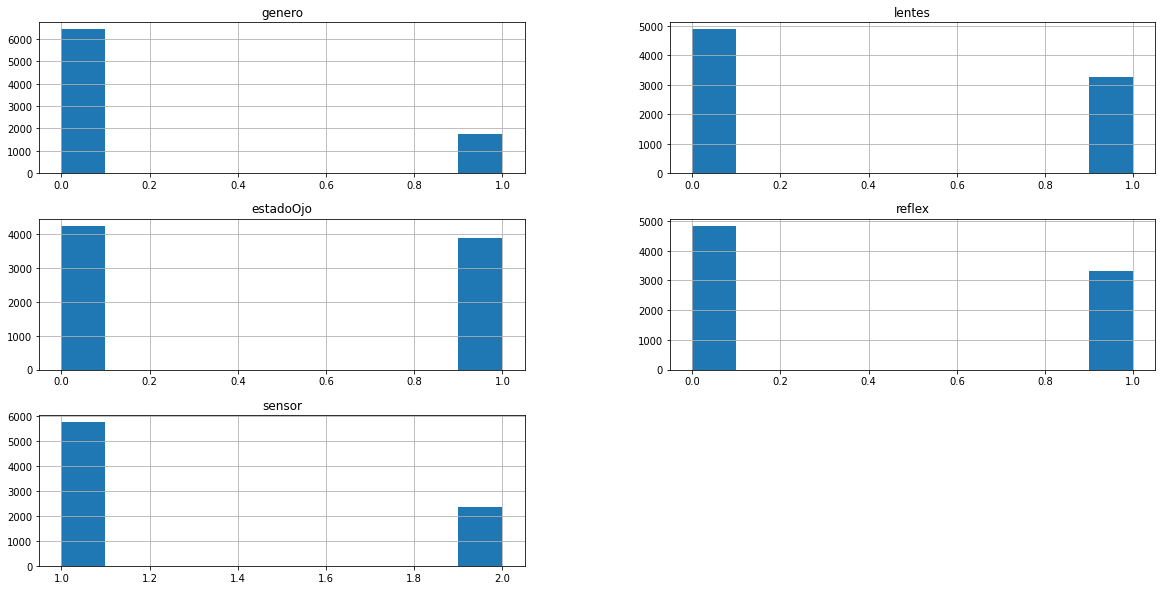

In [ ]:
data.hist(figsize=(20,10))

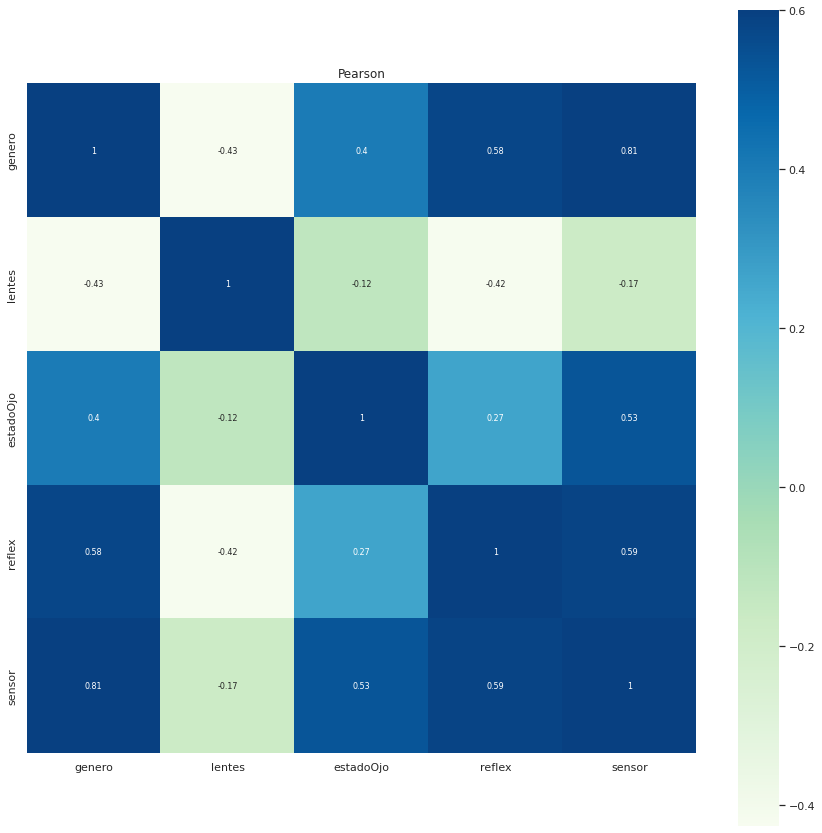

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(data.corr(),vmax=0.6,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={"size":8})

array de img

In [ ]:
def arrImg(dir):
  img = []
  for i in dir:
    try: 
      subDir = os.listdir('/home/mrlEyes_2018_01/'+i)
      for j in subDir:
        x = cv2.imread('/home/mrlEyes_2018_01/'+i+'/'+j)
        x = cv2.resize(x,(224,224),interpolation = cv2.INTER_AREA)
        #x=tf.keras.utils.normalize(x)
        img.append(x)
    except:
      'no es dir'
  arrImg = np.array(img)
  img = []
  return arrImg

In [ ]:
x = cv2.imread('/home/mrlEyes_2018_01/s0001/s0001_00005_0_0_0_0_0_01.png')
x = cv2.resize(x,(180,180),interpolation = cv2.INTER_AREA)
arr = np.array(x)
#x=tf.keras.utils.normalize(arr)

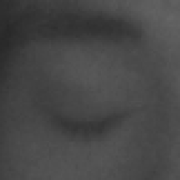

In [ ]:
cv2_imshow(arr)

In [ ]:
arrImg = arrImg(os.listdir('/home/mrlEyes_2018_01/'))

In [ ]:
print(arrImg.shape)

(8153, 224, 224, 3)


In [ ]:
!nvidia-smi
!kill process_id
from google.colab import output
output.clear()

In [ ]:
y=data['estadoOjo']
X=arrImg


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

Redes Neuronales ResNet

In [ ]:
model = k.Sequential()

In [ ]:
from keras.layers.pooling import MaxPooling2D
from keras.layers.core.activation import Activation
from keras.backend import conv2d
model.add(k.layers.InputLayer(input_shape = (224,224,3)))
model.add(k.layers.BatchNormalization())

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(k.layers.Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      3

In [ ]:

opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss = "MSE", optimizer = opt, metrics = ['accuracy'])

NameError: ignored

In [ ]:
#model = k.models.load_model('/content/drive/MyDrive/modelBlink.h5')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=10,verbose=1,batch_size=64)

Epoch 1/10
86/86 [==============================] - 62s 707ms/step - loss: 0.2625 - accuracy: 0.8995 - val_loss: 0.5867 - val_accuracy: 0.7042
Epoch 2/10
86/86 [==============================] - 62s 723ms/step - loss: 0.1329 - accuracy: 0.9561 - val_loss: 0.1291 - val_accuracy: 0.9573
Epoch 3/10
86/86 [==============================] - 62s 726ms/step - loss: 0.1033 - accuracy: 0.9617 - val_loss: 0.0925 - val_accuracy: 0.9695
Epoch 4/10
86/86 [==============================] - 61s 708ms/step - loss: 0.0846 - accuracy: 0.9716 - val_loss: 0.0820 - val_accuracy: 0.9747
Epoch 5/10
86/86 [==============================] - 61s 707ms/step - loss: 0.0781 - accuracy: 0.9716 - val_loss: 0.0943 - val_accuracy: 0.9684
Epoch 6/10
86/86 [==============================] - 61s 706ms/step - loss: 0.0680 - accuracy: 0.9777 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 7/10
86/86 [==============================] - 61s 706ms/step - loss: 0.0589 - accuracy: 0.9797 - val_loss: 0.0652 - val_accuracy: 0.9803

In [ ]:
model.save('/content/drive/MyDrive/modelBlink.h5')

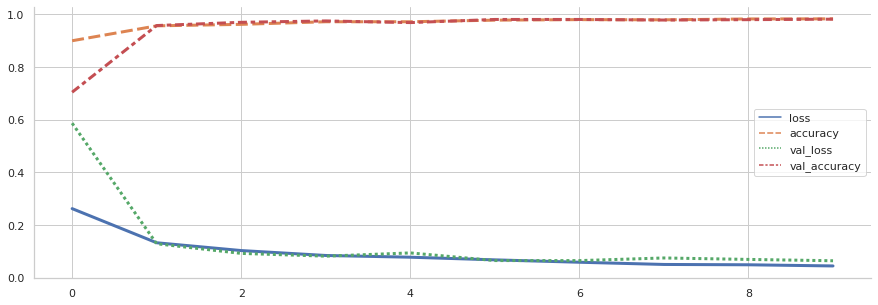

In [ ]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()